In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


## Algo process detail
Description :
Given a "known" data distribution P with domain X, and a function f:X->f(x). Given n pts {x1, …, x_n } \in X not sampled from P, can you estimate E_P[f(x)] through these n pts? A: Use Riemann Stieltjes to get grids of X. And Use {f(x1), f(x2), …, f(xn)} to bestow value to all grids. (Like using nearest neighbor bestowing).

Implementing:
0. Given a function f
1. Given a distribution <br>
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
pdf(x, mean=None, cov=1, allow_singular=False)
cdf(x, mean=None, cov=1, allow_singular=False, maxpts=1000000*dim, abseps=1e-5, releps=1e-5, lower_limit=None)
rvs(mean=None, cov=1, size=1, random_state=None) # Draw random samples from a multivariate normal distribution.
2. sample n points from it
n = 20 <br>
x_s = rvs(mean=None, cov=1, size=n, random_state=None) <br>
f_x_s = [f(x) for x in x_s]
3. Generates m cubics grids # How?
Given Is = [I1, I2 ,..., Im] # m cubic
4. Compute center -> closest x_s -> bestow f(x_s) -> find p. of  each cube
5. Sum p. * f(x_s) to estimate E_p[f(x)]


In [2]:

# Define the mean vector (2-dimensional)
mean = [0, 0]

# Define the covariance matrix (2x2)
covariance = [[3, 0], [0, 1]]

# Number of samples to generate
n = 5

# Generate n samples from the 2-dimensional normal distribution
samples = multivariate_normal.rvs(mean=mean, cov=covariance, size=n)

print(samples)

[[ 1.00331646 -0.21308227]
 [ 1.5736591   0.10045777]
 [-2.38901797  0.90778584]
 [-0.57494446  0.5226155 ]
 [-4.34771329  2.11187798]]


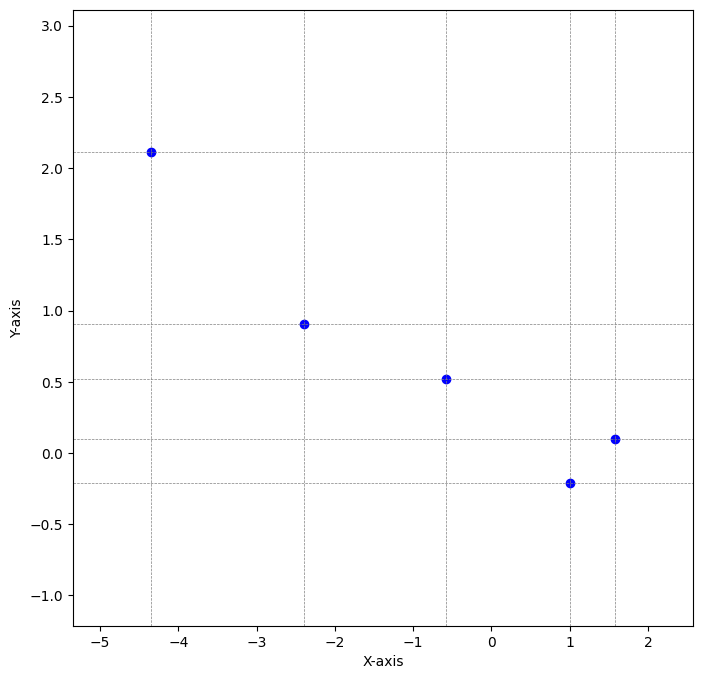

In [3]:
points = samples


# Create the plot
plt.figure(figsize=(8, 8))

# Plot the points
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o')

# Draw vertical and horizontal lines passing through each point
for x, y in points:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Set x and y axis labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Set the range for the axes to include some padding around the points
padding = 1
x_min, x_max = points[:, 0].min() - padding, points[:, 0].max() + padding
y_min, y_max = points[:, 1].min() - padding, points[:, 1].max() + padding

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Disable the default grid
plt.grid(False)

# Show the plot
plt.show()

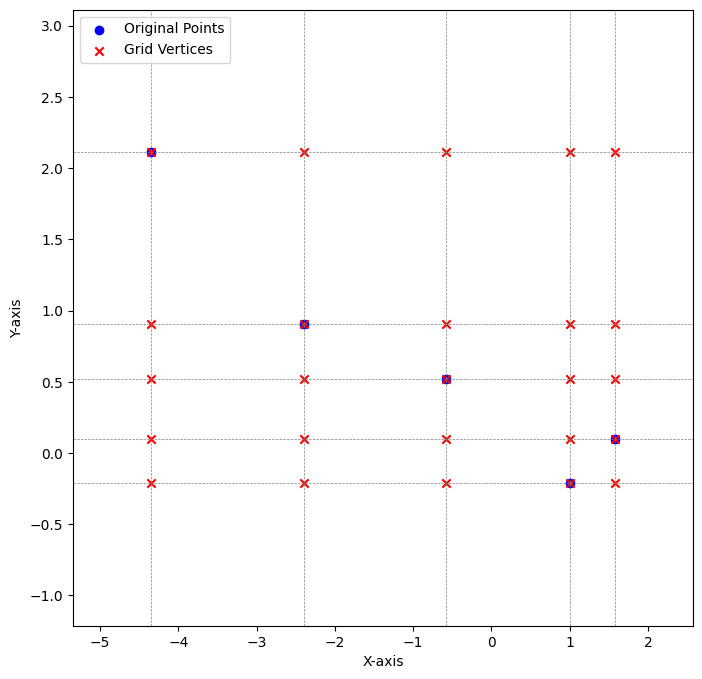

In [4]:
unique_x = np.unique(points[:, 0])
unique_y = np.unique(points[:, 1])

# Generate all combinations of x and y coordinates
grid_vertices = [(x, y) for x in unique_x for y in unique_y]

# Convert grid vertices to numpy array for easy plotting
grid_vertices = np.array(grid_vertices)

# Create the plot
plt.figure(figsize=(8, 8))

# Plot the original points
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o', label='Original Points')

# Plot the grid vertices
plt.scatter(grid_vertices[:, 0], grid_vertices[:, 1], c='red', marker='x', label='Grid Vertices')

# Draw vertical and horizontal lines passing through each unique point
for x in unique_x:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
for y in unique_y:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Set x and y axis labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Set the range for the axes to include some padding around the points
padding = 1
x_min, x_max = points[:, 0].min() - padding, points[:, 0].max() + padding
y_min, y_max = points[:, 1].min() - padding, points[:, 1].max() + padding

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Add a legend
plt.legend()

# Show the plot
plt.show()

((-4.347713291453931, -0.21308227251578127), (-2.389017974530164, 0.10045776665575122))
((-4.347713291453931, 0.10045776665575122), (-2.389017974530164, 0.5226154954788401))
((-4.347713291453931, 0.5226154954788401), (-2.389017974530164, 0.9077858392462538))
((-4.347713291453931, 0.9077858392462538), (-2.389017974530164, 2.111877982171925))
((-4.347713291453931, 2.111877982171925), (-2.389017974530164, inf))
((-2.389017974530164, -0.21308227251578127), (-0.5749444623841587, 0.10045776665575122))
((-2.389017974530164, 0.10045776665575122), (-0.5749444623841587, 0.5226154954788401))
((-2.389017974530164, 0.5226154954788401), (-0.5749444623841587, 0.9077858392462538))
((-2.389017974530164, 0.9077858392462538), (-0.5749444623841587, 2.111877982171925))
((-2.389017974530164, 2.111877982171925), (-0.5749444623841587, inf))
((-0.5749444623841587, -0.21308227251578127), (1.0033164576278981, 0.10045776665575122))
((-0.5749444623841587, 0.10045776665575122), (1.0033164576278981, 0.52261549547884

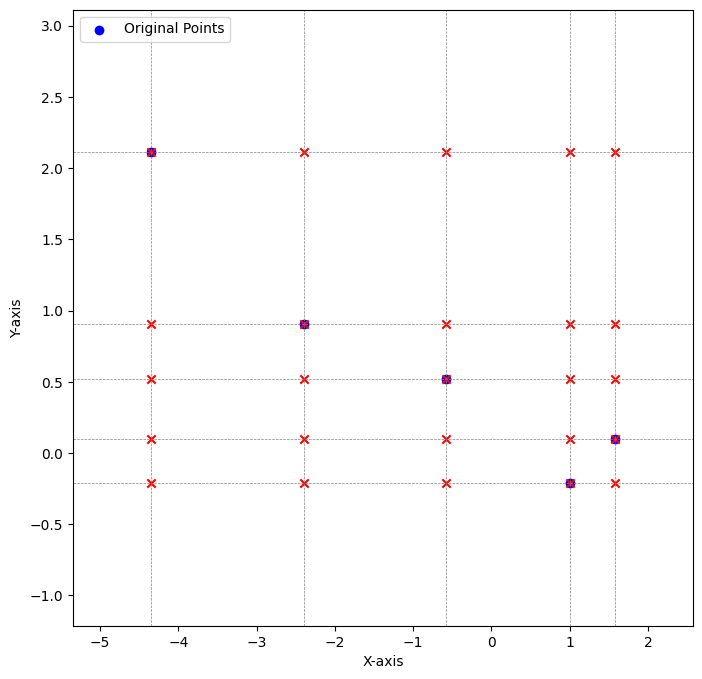

In [5]:
unique_x = np.unique(points[:, 0])
unique_y = np.unique(points[:, 1])

# Sort coordinates
unique_x = np.sort(unique_x)
unique_y = np.sort(unique_y)

# Extend coordinates to include an "infinity" region
unique_x_extended = np.append(unique_x, np.inf)
unique_y_extended = np.append(unique_y, np.inf)

# Generate all possible rectangles
cubes = []
for i in range(len(unique_x)):
    for j in range(len(unique_y)):
        x1, x2 = unique_x[i], unique_x_extended[i + 1]
        y1, y2 = unique_y[j], unique_y_extended[j + 1]
        cubes.append(((x1, y1), (x2, y2)))

# Print the cubes
for cube in cubes:
    print(cube)

# Plotting the points and the grid
plt.figure(figsize=(8, 8))

# Plot the original points
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o', label='Original Points')

# Plot the grid vertices
for x in unique_x:
    for y in unique_y:
        plt.scatter(x, y, c='red', marker='x')

# Draw vertical and horizontal lines passing through each unique point
for x in unique_x:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
for y in unique_y:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Set x and y axis labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Set the range for the axes to include some padding around the points
padding = 1
x_min, x_max = points[:, 0].min() - padding, points[:, 0].max() + padding
y_min, y_max = points[:, 1].min() - padding, points[:, 1].max() + padding

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [6]:
cubes = []
for i in range(len(unique_x)):
    for j in range(len(unique_y)):
        x1, x2 = unique_x[i], unique_x_extended[i + 1]
        y1, y2 = unique_y[j], unique_y_extended[j + 1]
        cube = [(x1, y1), (x1, y2), (x2, y1), (x2, y2)]
        cubes.append(cube)

# Print the cubes with four vertices
for cube in cubes:
    print(cube)


[(-4.347713291453931, -0.21308227251578127), (-4.347713291453931, 0.10045776665575122), (-2.389017974530164, -0.21308227251578127), (-2.389017974530164, 0.10045776665575122)]
[(-4.347713291453931, 0.10045776665575122), (-4.347713291453931, 0.5226154954788401), (-2.389017974530164, 0.10045776665575122), (-2.389017974530164, 0.5226154954788401)]
[(-4.347713291453931, 0.5226154954788401), (-4.347713291453931, 0.9077858392462538), (-2.389017974530164, 0.5226154954788401), (-2.389017974530164, 0.9077858392462538)]
[(-4.347713291453931, 0.9077858392462538), (-4.347713291453931, 2.111877982171925), (-2.389017974530164, 0.9077858392462538), (-2.389017974530164, 2.111877982171925)]
[(-4.347713291453931, 2.111877982171925), (-4.347713291453931, inf), (-2.389017974530164, 2.111877982171925), (-2.389017974530164, inf)]
[(-2.389017974530164, -0.21308227251578127), (-2.389017974530164, 0.10045776665575122), (-0.5749444623841587, -0.21308227251578127), (-0.5749444623841587, 0.10045776665575122)]
[(-2